In [88]:
# Importar librerias
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime

# 1. División de Datos en Train, Val y Test

### Utilizar el archivo de entrenamiento

In [89]:
Train = pd.read_csv("california_housing_train.csv")

In [90]:
Train.shape

(17000, 9)

In [91]:
Train.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0

### Particionar el archivo de prueba en dos conjuntos: train y test, dividiendolo al 50%

In [92]:
test = pd.read_csv("california_housing_test.csv")

In [93]:
test.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0

In [94]:
test.shape

(3000, 9)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Dividir el DataFrame Train en dos conjuntos: validación y prueba
val, test = train_test_split(test, test_size=0.5, random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de val: {val.shape}")
print(f"Tamaño del conjunto de test: {test.shape}")

Tamaño del conjunto de val: (1500, 9)
Tamaño del conjunto de test: (1500, 9)


# 2. Regresión Lineal y Árbol de Decisiones

### Implementar el modelo de regresión lineal y obtener el valor de las métricas, RMSE Raíz cuadrada del error cuadrático medio y MAPE Error de porcentaje absoluto medio.

In [97]:
Train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Dividir las variables independientes (X) y dependiente (y)
X = Train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']]
y = Train['median_house_value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Crear e implementar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular métricas
n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de variables independientes

# R cuadrada ajustada
r2 = model.score(X_test, y_test)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir resultados
print(f"R² ajustada: {r2_adjusted:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

R² ajustada: 0.6497
RMSE: 69503.6895
MAPE: 29.68%


¿Qué mide cada una de estas métricas? Indica algunas ventajas y desventajas de cada una de ellas?

𝑅
2
R 
2
  ajustada (Coeficiente de determinación ajustado):
Qué mide: Indica la proporción de la variabilidad de la variable dependiente (
𝑦
y) que es explicada por las variables independientes (
𝑋
X), ajustando por el número de predictores en el modelo. Penaliza la inclusión de variables irrelevantes.
Ventajas:
Ajusta 
𝑅
2
R 
2
  para reflejar mejor la calidad del modelo al incluir más predictores.
Útil para comparar modelos con diferente número de variables independientes.
Desventajas:
No mide directamente el error en las predicciones.
Puede ser difícil de interpretar si los datos tienen una estructura compleja.

RMSE (Raíz Cuadrada del Error Cuadrático Medio):
Qué mide: Es la raíz cuadrada de la media de los errores al cuadrado entre los valores predichos y los observados. Representa el error promedio en las mismas unidades que la variable dependiente.
Ventajas:
Fácil de interpretar porque está en las mismas unidades que la variable objetivo.
Penaliza los errores grandes más que los pequeños debido a la elevación al cuadrado.
Desventajas:
Sensible a valores atípicos, ya que los errores grandes tienen un impacto desproporcionado.
No es intuitivo para medir errores relativos o en porcentajes.

MAPE: el MAPE mide en promedio cuánto se desvían los valores predichos de los valores reales, expresado como un porcentaje.

### Con base al desempeño obtenido de los modelos, ¿qué podemos concluir por el momento?

R² ajustada de 0.6497, indica que aproximadamente el 64.97% de la variabilidad de los datos puede ser explicada por el modelo. 
El RMSE de 69503.68 sugiere una desviación significativa entre los valores predichos y los valores observados, 
El MAPE del 29.68% indica un error porcentual promedio en las predicciones del modelo.

Conclusión, el modelo debería revisarse para buscar reducir el error

# 3. Análisis de Correlación:

### Obtener la matriz de correlación de Pearson de todas las variables numéricas del conjunto de entrenamiento.

Matriz de correlación de Pearson:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925580           -0.110021     0.044623   
latitude            -0.925580  1.000000            0.014347    -0.035559   
housing_median_age  -0.110021  0.014347            1.000000    -0.364398   
total_rooms          0.044623 -0.035559           -0.364398     1.000000   
total_bedrooms       0.069533 -0.066036           -0.325801     0.930628   
population           0.096368 -0.105128           -0.296513     0.856690   
households           0.056920 -0.071244           -0.308844     0.921142   
median_income       -0.019071 -0.076823           -0.114089     0.190022   

                    total_bedrooms  population  households  median_income  
longitude                 0.069533    0.096368    0.056920      -0.019071  
latitude                 -0.066036   -0.105128   -0.071244      -0.076823  
housing_median_age       -0.325801   -0.296513   -0.3

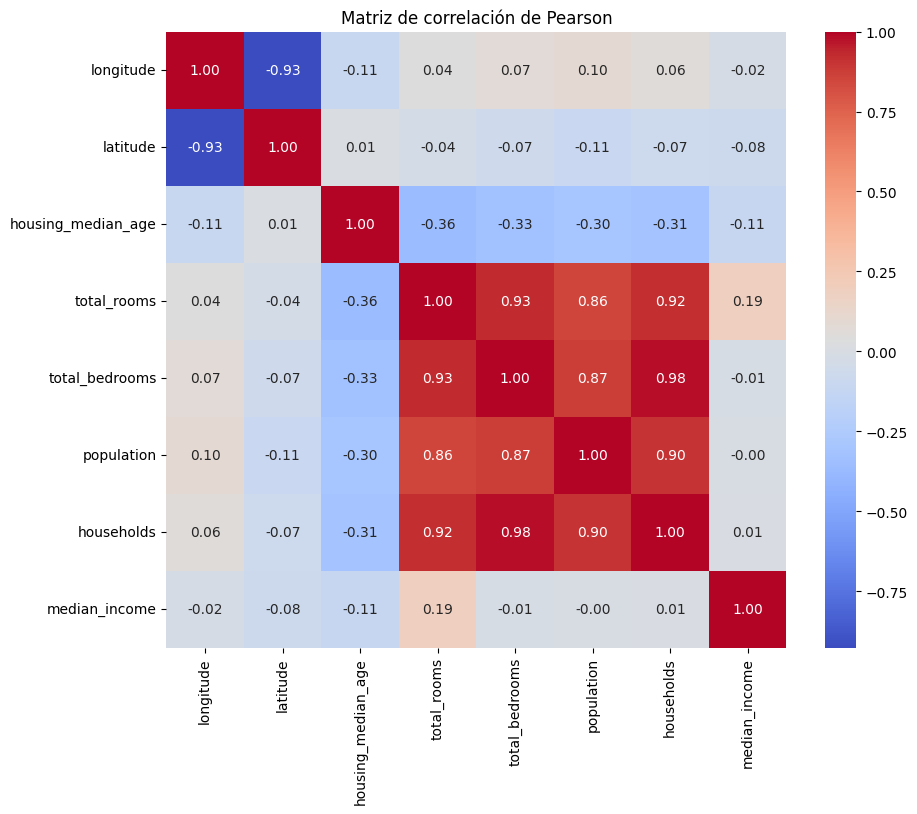

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas del conjunto de entrenamiento
numerical_vars = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'total_bedrooms', 'population', 'households', 'median_income']
X_train_numeric = X_train[numerical_vars]

# Calcular la matriz de correlación de Pearson
correlation_matrix = X_train_numeric.corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de correlación de Pearson:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de Pearson")
plt.show()

La correlación de pearson observa correlaciones lineales, para este caso no aplica ya que este modelo no corresponde necesariamente a este tipo de relación

### ¿Qué puedes concluir de dicha matriz?

1. Las variables de latitud y longitud se encuentran altamente correlacionadas, de igual manera, total_rooms y total_bedrooms, population y households

In [100]:
# Activar folium cuando no lo tienes cargado en el sistema
#pip install folium

Mapeo de la variable longiud y latitud

In [101]:
import folium

# Crear un mapa centrado en el promedio de longitud y latitud
map_center = [X_train_numeric['latitude'].mean(), X_train_numeric['longitude'].mean()]
mapa = folium.Map(location=map_center, zoom_start=10)

# Agregar puntos al mapa
for lat, lon in zip(X_train_numeric['latitude'], X_train_numeric['longitude']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa)

# Mostrar el mapa
mapa

### En particular, compara los resultados de dos modelos: utilizando los dos factores longitud y latitud y eliminando una de estas variables.

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Dividir las variables independientes (X) y dependiente (y)
X = Train[['latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']]
y = Train['median_house_value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear e implementar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular métricas
n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de variables independientes

# R cuadrada ajustada
r2 = model.score(X_test, y_test)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir resultados
print(f"R² ajustada: {r2_adjusted:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

R² ajustada: 0.5875
RMSE: 75429.0490
MAPE: 33.02%


¿Qué podemos concluir de este ejercicio?

El modelo se hace menos explicativo, R cuadrada se reduce, el error en RMSE incrementa, mientras que el MAPE incrementa,  esto indica un peor desempeño, sus predicciones se alejan más de los valores reales en comparación con el modelo anterior.

# 3. Histogramas

### Obtener el histograma de todas las variables del conjunto de entrenamiento

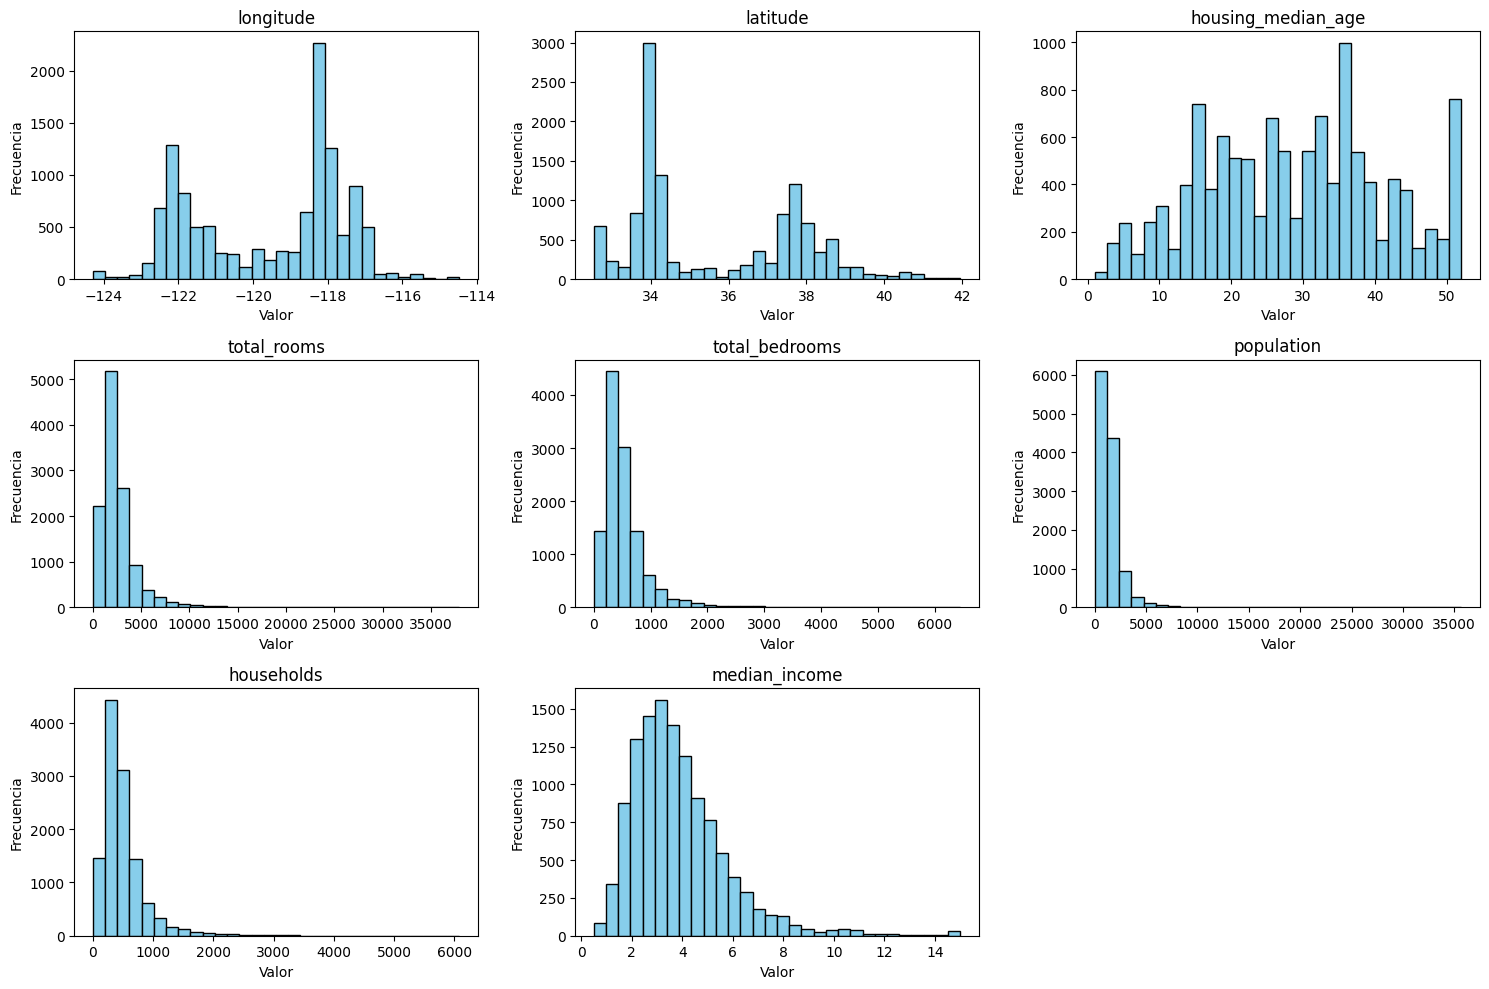

In [103]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura y el número de subgráficos
num_vars = X_train_numeric.shape[1]  # Número de variables
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Generar un histograma para cada variable
for i, column in enumerate(X_train_numeric.columns):
    ax = axes[i]
    ax.hist(X_train_numeric[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Eliminar subgráficos vacíos si hay menos variables que subgráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### En particular, ¿qué puedes inferir de los histogramas de las variables longitud y latitud?

Tienen un comportamiento bimodal, se debe a la ubicación de las casas, probablemente a que muchas casas están ubicadas al norte/sur, costa este/oeste. Estas dos jorobas representarían por ejemplo que tienes dos poblaciones diferentes pero que están agrupadas en una sola. Debemos ayudar al modelo para que no saque el promedio y te dé el valle de las dos jorobas. Representan dos procesos diferentes que están mezclados.

### ¿Qué tipo de ingeniería de características podríamos aplicar, con base al comportamiento de las variables longitud y latitud?, hacer un reacomodo de las longitudes y latitudes?

Debemos agregar una variable categórica para diferenciar las poblaciones, proponemos usar cuatro cuadrantes: noreste, noroeste, sureste y suroeste a partir del centro de la muestra.

# 4. Valores extremos Outliers de la variable de salida:

### ¿Qué puedes inferir del diagrama de caja de la variable de salida?

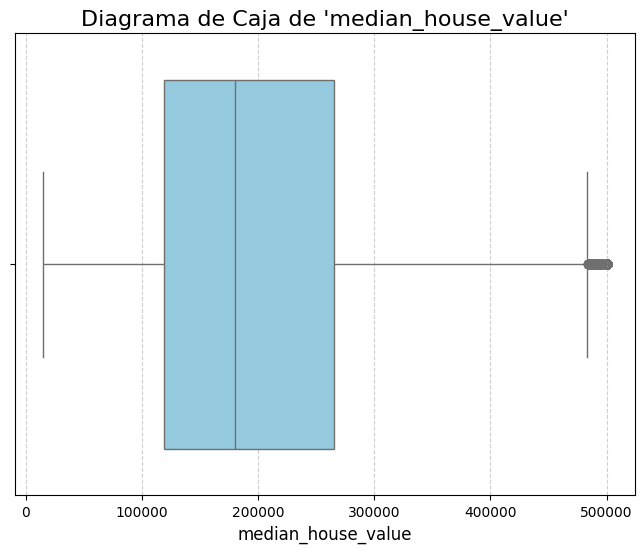

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, color='skyblue')

# Configurar el gráfico
plt.title("Diagrama de Caja de 'median_house_value'", fontsize=16)
plt.xlabel("median_house_value", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### ¿Qué puedes inferir del diagrama de caja de la variable de salida?

Hay casas outliers por arriba de los 4.8 millones

### Comparar el desempeño del modelo con y sin outliers.

In [105]:
# Eliminación de outliers en el modelo

# Calcular los cuartiles y el rango intercuartil (IQR)
Q1 = Train['median_house_value'].quantile(0.25)  # Primer cuartil
Q3 = Train['median_house_value'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
Train_filtered = Train[(Train['median_house_value'] >= lower_bound) & 
                       (Train['median_house_value'] <= upper_bound)]

# Mostrar resultados
print(f"Datos originales: {len(Train)} filas")
print(f"Datos después de eliminar outliers: {len(Train_filtered)} filas")


Datos originales: 17000 filas
Datos después de eliminar outliers: 16105 filas


In [106]:
# Dividir las variables independientes (X) y dependiente (y) usando Train_filtered
X = Train_filtered[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']]
y = Train_filtered['median_house_value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear e implementar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular métricas
n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de variables independientes

# R cuadrada ajustada
r2 = model.score(X_test, y_test)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir resultados
print(f"R² ajustada: {r2_adjusted:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

R² ajustada: 0.6198
RMSE: 58601.4846
MAPE: 28.80%


Comparar el desempeño del modelo con y sin outliers

#### Modelo 1 con Outliers
R² ajustada: 0.6497
RMSE: 69503.6895
MAPE: 29.68%

#### Modelo 2 sin Outliers
R² ajustada: 0.6198
RMSE: 58601.4846
MAPE: 28.80%

Conclusión: La r cuadrada ajustada se reduce, lo que puede ser indicación de un mejor desempeño del modelo sin Ouliers, sin embargo el error RMSE disminuye al igual que el MAPE lo que indica que el Modelo 2 está reduciendo el error ya que se concentra la muestra. 

# 5. Llevar a cabo entramiendo del modelo considerando los siguientes puntos:

* Verificar que el modelo no esté sobreentrenado (Overfiting)
* Verificar que el modelo no esté subentrenado (Underfitting)
* Evitar filtrado de la información
* ¿Qué es el filtrado de información (data leakage)
* Applicr VAlidación Cruzada (Cross-Validation)
* Utilizar y comparar los resultados de las metricas R2 ajustada, RMSE, MAE, MAPE.
* Interpretar lo que cada métrica dice sobre el desempeño del modelo

### Generaremos las regiones que anteriormente proponiamos para clusterizar las casas de acuerdo con latitud y longuitud

In [107]:
# Definir los límites para dividir en cuadrantes
lat_median = Train['latitude'].median()
lon_median = Train['longitude'].median()

# Crear una función para asignar categorías
def assign_region(row):
    if row['latitude'] >= lat_median and row['longitude'] >= lon_median:
        return 'noreste'
    elif row['latitude'] >= lat_median and row['longitude'] < lon_median:
        return 'noroeste'
    elif row['latitude'] < lat_median and row['longitude'] >= lon_median:
        return 'sureste'
    else:
        return 'suroeste'

# Aplicar la función a cada fila del DataFrame
Train_filtered['region'] = Train_filtered.apply(assign_region, axis=1)

# Mostrar las primeras filas para verificar
print(Train_filtered[['latitude', 'longitude', 'region']].head())

   latitude  longitude   region
0     34.19    -114.31  sureste
1     34.40    -114.47  noreste
2     33.69    -114.56  sureste
3     33.64    -114.57  sureste
4     33.57    -114.57  sureste


C:\Users\L03129163\AppData\Local\Temp\ipykernel_32744\2308990994.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_filtered['region'] = Train_filtered.apply(assign_region, axis=1)


In [108]:
Train_filtered.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value   region  
0      1015.0       472.0         1.4936             66900.0  sureste  
1      1129.0       463.0         1.8200             80100.0  noreste

In [109]:
Train_filtered.region.unique()

array(['sureste', 'noreste', 'noroeste', 'suroeste'], dtype=object)

Utilizamos el OneHotEncoder para convertir la variable categórica en variables dummy

In [110]:
from sklearn.preprocessing import OneHotEncoder

# Crear variables dummy de la columna 'region'
region_encoded_df = pd.get_dummies(Train_filtered['region'], drop_first=True)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar la variable 'region'
region_encoded = one_hot_encoder.fit_transform(Train_filtered[['region']])

# Convertir el resultado a un DataFrame y unirlo al DataFrame original
region_encoded_df = pd.DataFrame(region_encoded, columns=one_hot_encoder.get_feature_names_out(['region']))
Train_filtered = pd.concat([Train_filtered, region_encoded_df], axis=1)

# Mostrar las primeras filas para verificar
Train_filtered.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value   region  \
0      1015.0       472.0         1.4936             66900.0  sureste   
1      1129.0       463.0         1.8200             80100.0  noreste   
2       333.0       117.0         1.6509             85700.0  sureste   
3       515.0       226.0         3.1917             73400.0  sureste   
4       624.0       262.0         1.9250             65500.0  sureste   

   region_noroeste  region_sureste  region_suroeste  
0              0.0             1.0              0.0  
1              0.0             0.0              0.0  
2              0.0             1.0              0.0  
3              0.0             1.0              0.0  
4              0.0             1.0              0.0

En una regresión lineal, la transformación de etiquetas con LabelEncoder podría no ser la mejor opción. Esto es porque LabelEncoder asigna números enteros a cada categoría, lo que podría introducir una falsa ordinalidad y malinterpretar la relación entre las categorías y la variable de respuesta. Por ejemplo, asignar 0, 1, 2 a 'noroeste', 'noreste', 'sureste' respectivamente, podría inducir a que el modelo entienda erróneamente que existe una relación de orden y distancia entre las categorías.

Utilizaremos One-Hote Encoder

In [111]:
Train_filtered.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'region', 'region_noroeste', 'region_sureste',
       'region_suroeste'],
      dtype='object')

In [112]:
# Eliminar la variable 'region' del dataframe Train_filtered
Train_filtered = Train_filtered.drop(columns=['region'])

# Mostrar las primeras filas para verificar
Train_filtered.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  region_noroeste  \
0      1015.0       472.0         1.4936             66900.0              0.0   
1      1129.0       463.0         1.8200             80100.0              0.0   
2       333.0       117.0         1.6509             85700.0              0.0   
3       515.0       226.0         3.1917             73400.0              0.0   
4       624.0       262.0         1.9250             65500.0              0.0   

   region_sureste  region_suroeste  
0             1.0              0.0  
1             0.0              0.0  
2             1.0              0.0  
3             1.0              0.0  
4             1.0              0.0

In [113]:
Train_filtered.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'region_noroeste', 'region_sureste',
       'region_suroeste'],
      dtype='object')

In [114]:
Train_filtered.isnull().sum()

longitude             853
latitude              853
housing_median_age    853
total_rooms           853
total_bedrooms        853
population            853
households            853
median_income         853
median_house_value    853
region_noroeste       853
region_sureste        853
region_suroeste       853
dtype: int64

In [ ]:
Train_filtered

In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Dividir las variables independientes (X) y dependiente (y)
X = Train_filtered[['longitude', 
                    'latitude', 
                    'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'region_noroeste', 'region_sureste',
       'region_suroeste']]
y = Train_filtered['median_house_value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión lineal
model = LinearRegression()
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Asegurar que y_train tenga los mismos índices
# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Asegurar que y_train tenga los mismos índices
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular métricas en el conjunto de prueba
n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de variables independientes

# R² ajustada
r2 = model.score(X_test, y_test)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir resultados
print("Resultados del modelo:")
print(f"R² ajustada: {r2_adjusted:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print("\nValidación cruzada (R² promedio):")
print(f"R² promedio (CV): {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Resultados del modelo:
R² ajustada: 0.6160
RMSE: 59373.4221
MAE: 44138.7919
MAPE: 28.17%

Validación cruzada (R² promedio):
R² promedio (CV): 0.5994 (±0.0197)


Comparativa Entre Modelos

#### Modelo 1 con Outliers
R² ajustada: 0.6497
RMSE: 69503.6895
MAPE: 29.68%

#### Modelo 2 sin Outliers
R² ajustada: 0.6198
RMSE: 58601.4846
MAPE: 28.80%

#### Modelo  3
R² ajustada: 0.6144
RMSE: 58911.4807
MAE: 43323.9495
MAPE: 27.66%

En general la r cuadrada es menor que en el primer modelo pero el MAPE mejora

1. R² ajustada: la explicabilidad del modelo es menor que el modelo 1

2. RMSE: 58,911
Significado:
La raíz del error cuadrático medio mide el error promedio en las mismas unidades que la variable dependiente (median_house_value), es decir, dólares.Un RMSE de 58,911 significa que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente $58,911

3. MAE: 43,323
Significado:
El error absoluto medio mide el error promedio en términos absolutos, sin considerar la dirección del error.Un MAE de 43,323 significa que, en promedio, las predicciones del modelo están desviadas del valor real en aproximadamente $43,323.

4. MAPE: 27.66%
Significado:
El error de porcentaje absoluto medio mide el error como un porcentaje relativo de los valores reales. Un MAPE de 27.66% significa que, en promedio, las predicciones del modelo tienen un error del 27.66% respecto al valor real.

6. Análisis de Factores

Realizar un análisis de factores para determinar las variables más importantes en la predicción

Utilizaremos Análisis de componentes principales

Verificar que el modelo no esté subentrenado o sobreentrenado

GEneración de las regiones en validación

In [131]:
# Definir los límites para dividir en cuadrantes
lat_median_val = val['latitude'].median()
lon_median_val = val['longitude'].median()

# Crear una función para asignar categorías
def assign_region_val(row):
    if row['latitude'] >= lat_median_val and row['longitude'] >= lon_median_val:
        return 'noreste'
    elif row['latitude'] >= lat_median_val and row['longitude'] < lon_median_val:
        return 'noroeste'
    elif row['latitude'] < lat_median_val and row['longitude'] >= lon_median_val:
        return 'sureste'
    else:
        return 'suroeste'

# Aplicar la función a cada fila del DataFrame de validación
val['region'] = val.apply(assign_region_val, axis=1)

# Mostrar las primeras filas para verificar
val[['latitude', 'longitude', 'region']].head()

latitude  longitude    region
53       33.80    -118.17   sureste
258      33.89    -116.63   sureste
505      34.05    -118.18   sureste
752      33.93    -118.28   sureste
1978     38.91    -120.97  noroeste

In [132]:
# Crear variables dummy de la columna 'region' en el DataFrame de validación
region_encoded_val_df = pd.get_dummies(val['region'], drop_first=True)

# Unir las variables dummy al DataFrame de validación
val = pd.concat([val, region_encoded_val_df], axis=1)

In [133]:
val.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
53     -118.17     33.80                26.0       1589.0           380.0   
258    -116.63     33.89                22.0       1540.0           364.0   

     population  households  median_income  median_house_value   region  \
53        883.0       366.0         3.5313            187500.0  sureste   
258       610.0       268.0         1.5227             71000.0  sureste   

     noroeste  sureste  suroeste  
53      False     True     False  
258     False     True     False

In [134]:
# Eliminar la variable 'region' del dataframe val
val = val.drop(columns=['region'])

# Mostrar las primeras filas para verificar
val.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
53      -118.17     33.80                26.0       1589.0           380.0   
258     -116.63     33.89                22.0       1540.0           364.0   
505     -118.18     34.05                41.0        762.0           147.0   
752     -118.28     33.93                42.0       1898.0           460.0   
1978    -120.97     38.91                 7.0       4341.0           716.0   

      population  households  median_income  median_house_value  noroeste  \
53         883.0       366.0         3.5313            187500.0     False   
258        610.0       268.0         1.5227             71000.0     False   
505        817.0       176.0         3.7500            123100.0     False   
752       1503.0       429.0         2.5179             97400.0     False   
1978      1978.0       682.0         4.8311            172200.0      True   

      sureste  suroeste  
53       True     False  
258      True     False  
505      True     False  
752      True     False  
1978    False     False

In [135]:
val.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'noroeste', 'sureste', 'suroeste'],
      dtype='object')

In [136]:
# Eliminar filas con valores nulos del DataFrame val
val = val.dropna()

# Mostrar las primeras filas para verificar
val.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
53      -118.17     33.80                26.0       1589.0           380.0   
258     -116.63     33.89                22.0       1540.0           364.0   
505     -118.18     34.05                41.0        762.0           147.0   
752     -118.28     33.93                42.0       1898.0           460.0   
1978    -120.97     38.91                 7.0       4341.0           716.0   

      population  households  median_income  median_house_value  noroeste  \
53         883.0       366.0         3.5313            187500.0     False   
258        610.0       268.0         1.5227             71000.0     False   
505        817.0       176.0         3.7500            123100.0     False   
752       1503.0       429.0         2.5179             97400.0     False   
1978      1978.0       682.0         4.8311            172200.0      True   

      sureste  suroeste  
53       True     False  
258      True     False  
505      True     False  
752      True     False  
1978    False     False

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

# Dividir las variables independientes (X) y dependiente (y)
X_val = val[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'noroeste', 'sureste', 'suroeste']]
y_val = val['median_house_value']

# Estandarizar los datos
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logistic_model, X_val_scaled, y_val, cv=kf, scoring='r2')

# Ajustar el modelo con los datos de validación
logistic_model.fit(X_val_scaled, y_val)

# Predicciones en el conjunto de validación
y_val_pred = logistic_model.predict(X_val_scaled)

# Calcular métricas en el conjunto de validación
n = X_val_scaled.shape[0]  # Número de observaciones
p = X_val_scaled.shape[1]  # Número de variables independientes

# R² ajustada
r2 = logistic_model.score(X_val_scaled, y_val)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# MAE
mae = mean_absolute_error(y_val, y_val_pred)

# MAPE
mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100

# Imprimir resultados
print("Resultados del modelo logístico:")
print(f"R² ajustada: {r2_adjusted:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print("\nValidación cruzada (R² promedio):")
print(f"R² promedio (CV): {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Resultados del modelo logístico:
R² ajustada: 0.1034
RMSE: 126205.5084
MAE: 86465.6373
MAPE: 47.56%

Validación cruzada (R² promedio):
R² promedio (CV): -0.3322 (±0.1735)


Este modelo no sirve, necesitamos un modelo más poderoso que explique mejor

# 6. Análisis de Factores

In [138]:
Train_filtered.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'region_noroeste', 'region_sureste',
       'region_suroeste'],
      dtype='object')

In [140]:
# Eliminar filas con valores nulos del DataFrame Train_filtered
Train_filtered = Train_filtered.dropna()

# Mostrar las primeras filas para verificar
Train_filtered.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  region_noroeste  \
0      1015.0       472.0         1.4936             66900.0              0.0   
1      1129.0       463.0         1.8200             80100.0              0.0   
2       333.0       117.0         1.6509             85700.0              0.0   
3       515.0       226.0         3.1917             73400.0              0.0   
4       624.0       262.0         1.9250             65500.0              0.0   

   region_sureste  region_suroeste  
0             1.0              0.0  
1             0.0              0.0  
2             1.0              0.0  
3             1.0              0.0  
4             1.0              0.0

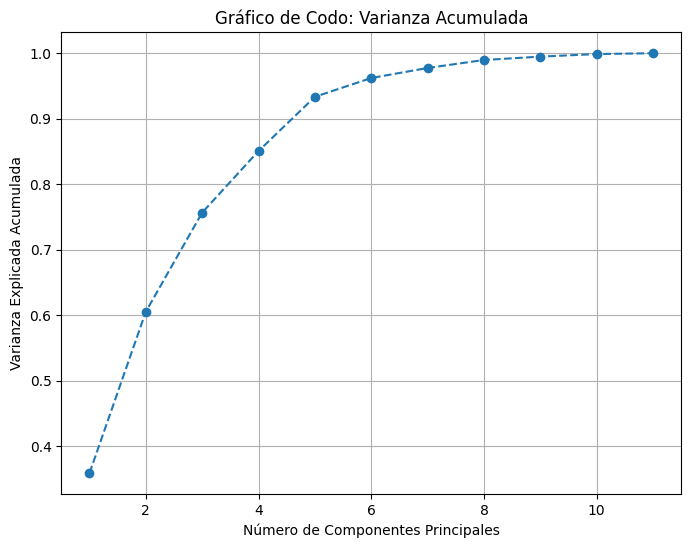

Cargas de los factores (componentes principales):
                          0         1         2         3         4   \
longitude           0.090213 -0.557227 -0.037058  0.016440 -0.140921   
housing_median_age -0.223172 -0.035689 -0.049238  0.250446  0.875312   
total_rooms         0.480907  0.087888  0.034138 -0.014414  0.045463   
total_bedrooms      0.484588  0.067209 -0.088395  0.048341  0.110182   
population          0.465759  0.043046 -0.110369  0.036096  0.112360   
households          0.485898  0.072072 -0.073921  0.050192  0.134659   
median_income       0.079857  0.019537  0.692514 -0.169288 -0.120621   
median_house_value  0.067419 -0.001780  0.684361  0.008285  0.275175   
region_noroeste    -0.079861  0.584664 -0.035779 -0.096625 -0.031865   
region_sureste      0.073666 -0.571298 -0.003227 -0.153864  0.098976   
region_suroeste     0.014262 -0.018390  0.142692  0.932149 -0.260620   

                          5         6         7         8         9         10  
long

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Variables independientes
X = Train_filtered[['longitude','latitude', 
                    'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'region_noroeste', 'region_sureste',
       'region_suroeste']]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Crear un gráfico de codo para visualizar la importancia de los componentes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Gráfico de Codo: Varianza Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

# Obtener las cargas de los factores (componentes principales)
loadings = pd.DataFrame(pca.components_, columns=X.columns)
print("Cargas de los factores (componentes principales):")
print(loadings.T)

# Determinar la importancia de cada variable
importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia (varianza explicada)': np.abs(pca.components_[0])
}).sort_values(by='Importancia (varianza explicada)', ascending=False)
print("\nImportancia de las variables en el primer componente:")
print(importance)


Interpretación de los resultados del PCA
Cargas de los factores (componentes principales):

Cada columna (0, 1, 2, ...) representa un componente principal.
Los valores en cada celda representan la carga factorial, es decir, qué tan fuertemente cada variable contribuye a ese componente.
Un valor más alto (en términos absolutos) indica una mayor influencia de la variable en ese componente.
Ejemplo:

En el primer componente (0), las variables más importantes son:
households (0.439051),
total_bedrooms (0.438347),
total_rooms (0.0.430096),
population (0.427082).
longitude (0.228206)
Latitude (0.228147)
Estas variables tienen las mayores cargas absolutas y, por lo tanto, son las que más contribuyen a explicar la varianza capturada por el primer componente.

Interpretación:

Estas variables están relacionadas con la cantidad de personas y viviendas en una región, lo que sugiere que tienen un impacto significativo en la predicción del valor medio de las casas.


Otras Pruebas:

1. Al agregar la región, probar si necesitamos quitar la longuitud y latitud, probar edjarlas y revisar si el modelo mejora o no.
* El modelo empeoró, entregó un MAPE de 31%
2. Al agregar cambios, considerar hacer cambios de uno en uno, para revisar los efectos.
* Realizamos varios modelos
3. Considerar otros tipos de encoder
* Ajustamos para usar variables dummy con OneHotEncoder para evitar que el modelo considere una especie de ordinalidad dentro de las regiones